# stalker.txt trimming --> saving as csv

In [58]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
import contextlib
import itertools

In [59]:
with open("./stalker_files/logs/tot_log/12jan2021.txt","r") as rf:
    file_contents = rf.read()
    file_contents = re.sub(r'pts/\d+', '', file_contents) # removes pseudo terminal indicators eg. "pts/6"
    file_contents = re.sub(r',+', ',', file_contents) # removes excessive commas, which were added by stalker.sh previously
    file_contents = re.sub(r',still,logged,in', '', file_contents) #removing activation time of still logged in
    file_contents = re.sub(r',(\(\d{2}:\d{2}\))', '', file_contents) #removing activation times, a more precise method now in "Insert Active column"
    file_contents = re.sub(r'reboot.+', '', file_contents) #removing server reboots
    '''removing square brackets from active time
    I get an error ->   Anomalous backslash in string: '\g'. String constant might be missing an r prefix.
    Just ignore it; see: (?P<name>...) in https://docs.python.org/3/library/re.html '''
    file_contents = re.sub(r'\((\d{2}:\d{2})\)', '\g<1>', file_contents) #removing square brackets from active time
    file_contents = re.sub(r'(\d{4})-(\d{4})', '\g<1>,\g<2>', file_contents) #separating start and end dates with a comma

In [60]:
print(file_contents, file=open("./stalker_files/stalker.csv", "w"))

## Trimmed CSV file created, time to tackle the data frame

In [61]:
df = pd.read_csv("./stalker_files/stalker.csv", parse_dates=["Login", "Logout"], names=["User", "IP", "Login", "Logout"])
df = df[~(df['Login'] < '2020-09-10')] #delete all data from before the classes started
df


,User,IP,Login,Logout
0,handyc,31.21.237.158,2020-09-24 21:37:13+00:00,2020-09-24 21:37:54+00:00
1,sicin2020,94.210.176.250,2020-09-24 20:08:02+00:00,2020-09-24 22:53:00+00:00
2,abdulhamity,85.145.84.107,2020-09-24 19:40:01+00:00,2020-09-24 22:36:40+00:00
3,sicin,94.210.176.250,2020-09-24 19:16:22+00:00,2020-09-24 20:07:45+00:00
4,manm,80.114.142.14,2020-09-24 17:22:22+00:00,2020-09-24 20:05:24+00:00
...,...,...,...,...
2826,aili,80.112.165.241,2021-01-10 10:21:54+00:00,2021-01-10 15:54:57+00:00
2827,aaholi159,80.114.142.14,2021-01-10 10:11:38+00:00,2021-01-10 10:48:02+00:00
2828,aaholi159,80.114.142.14,2021-01-10 09:02:49+00:00,2021-01-10 10:10:05+00:00
2829,aaholi159,80.114.142.14,2021-01-10 09:02:22+00:00,2021-01-10 10:47:45+00:00


#### Insert Active column

In [62]:
df["Active"] = df["Logout"] - df["Login"]
df

,User,IP,Login,Logout,Active
0,handyc,31.21.237.158,2020-09-24 21:37:13+00:00,2020-09-24 21:37:54+00:00,0 days 00:00:41
1,sicin2020,94.210.176.250,2020-09-24 20:08:02+00:00,2020-09-24 22:53:00+00:00,0 days 02:44:58
2,abdulhamity,85.145.84.107,2020-09-24 19:40:01+00:00,2020-09-24 22:36:40+00:00,0 days 02:56:39
3,sicin,94.210.176.250,2020-09-24 19:16:22+00:00,2020-09-24 20:07:45+00:00,0 days 00:51:23
4,manm,80.114.142.14,2020-09-24 17:22:22+00:00,2020-09-24 20:05:24+00:00,0 days 02:43:02
...,...,...,...,...,...
2826,aili,80.112.165.241,2021-01-10 10:21:54+00:00,2021-01-10 15:54:57+00:00,0 days 05:33:03
2827,aaholi159,80.114.142.14,2021-01-10 10:11:38+00:00,2021-01-10 10:48:02+00:00,0 days 00:36:24
2828,aaholi159,80.114.142.14,2021-01-10 09:02:49+00:00,2021-01-10 10:10:05+00:00,0 days 01:07:16
2829,aaholi159,80.114.142.14,2021-01-10 09:02:22+00:00,2021-01-10 10:47:45+00:00,0 days 01:45:23


In [63]:
df.drop_duplicates(subset =['Login', 'Logout'], keep="last", inplace=True)
df

,User,IP,Login,Logout,Active
0,handyc,31.21.237.158,2020-09-24 21:37:13+00:00,2020-09-24 21:37:54+00:00,0 days 00:00:41
1,sicin2020,94.210.176.250,2020-09-24 20:08:02+00:00,2020-09-24 22:53:00+00:00,0 days 02:44:58
2,abdulhamity,85.145.84.107,2020-09-24 19:40:01+00:00,2020-09-24 22:36:40+00:00,0 days 02:56:39
3,sicin,94.210.176.250,2020-09-24 19:16:22+00:00,2020-09-24 20:07:45+00:00,0 days 00:51:23
4,manm,80.114.142.14,2020-09-24 17:22:22+00:00,2020-09-24 20:05:24+00:00,0 days 02:43:02
...,...,...,...,...,...
2826,aili,80.112.165.241,2021-01-10 10:21:54+00:00,2021-01-10 15:54:57+00:00,0 days 05:33:03
2827,aaholi159,80.114.142.14,2021-01-10 10:11:38+00:00,2021-01-10 10:48:02+00:00,0 days 00:36:24
2828,aaholi159,80.114.142.14,2021-01-10 09:02:49+00:00,2021-01-10 10:10:05+00:00,0 days 01:07:16
2829,aaholi159,80.114.142.14,2021-01-10 09:02:22+00:00,2021-01-10 10:47:45+00:00,0 days 01:45:23


#### Time sort

In [64]:
df.sort_values(by=['Login'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,User,IP,Login,Logout,Active
0,handyc,31.21.237.158,2020-09-10 03:31:05+00:00,2020-09-10 04:13:58+00:00,0 days 00:42:53
1,handyc,31.21.237.158,2020-09-10 08:51:35+00:00,2020-09-10 14:00:35+00:00,0 days 05:09:00
2,heijmansear,31.21.237.158,2020-09-10 08:52:41+00:00,2020-09-10 08:52:43+00:00,0 days 00:00:02
3,sicin,83.28.219.167,2020-09-10 08:58:46+00:00,2020-09-10 11:11:00+00:00,0 days 02:12:14
4,eis,31.21.237.158,2020-09-10 09:01:11+00:00,2020-09-10 09:01:12+00:00,0 days 00:00:01
...,...,...,...,...,...
1679,anastasija,217.63.247.81,2021-01-11 19:49:14+00:00,2021-01-11 22:01:43+00:00,0 days 02:12:29
1680,aaholi159,80.114.142.14,2021-01-11 20:31:40+00:00,2021-01-11 23:13:39+00:00,0 days 02:41:59
1681,baksat,213.134.230.105,2021-01-11 21:34:54+00:00,2021-01-11 21:35:16+00:00,0 days 00:00:22
1682,anastasija,217.63.247.81,2021-01-11 22:21:21+00:00,NaT,NaT


In [65]:
df.dtypes


User                   object
IP                     object
Login     datetime64[ns, UTC]
Logout    datetime64[ns, UTC]
Active        timedelta64[ns]
dtype: object

#### Print base dataframe to csv

In [66]:
#df.to_csv("./stalker_files/stalker_headers.csv", index = False)

## Show login and logout times in CEST time zone

In [67]:
df_cest = df.loc[:, ["User", "Login", "Logout", "Active"]]
df_cest["Login"] = df_cest["Login"].dt.tz_convert('Europe/Amsterdam')
df_cest["Logout"] = df_cest["Logout"].dt.tz_convert('Europe/Amsterdam')

In [68]:
df_cest

,User,Login,Logout,Active
0,handyc,2020-09-10 05:31:05+02:00,2020-09-10 06:13:58+02:00,0 days 00:42:53
1,handyc,2020-09-10 10:51:35+02:00,2020-09-10 16:00:35+02:00,0 days 05:09:00
2,heijmansear,2020-09-10 10:52:41+02:00,2020-09-10 10:52:43+02:00,0 days 00:00:02
3,sicin,2020-09-10 10:58:46+02:00,2020-09-10 13:11:00+02:00,0 days 02:12:14
4,eis,2020-09-10 11:01:11+02:00,2020-09-10 11:01:12+02:00,0 days 00:00:01
...,...,...,...,...
1679,anastasija,2021-01-11 20:49:14+01:00,2021-01-11 23:01:43+01:00,0 days 02:12:29
1680,aaholi159,2021-01-11 21:31:40+01:00,2021-01-12 00:13:39+01:00,0 days 02:41:59
1681,baksat,2021-01-11 22:34:54+01:00,2021-01-11 22:35:16+01:00,0 days 00:00:22
1682,anastasija,2021-01-11 23:21:21+01:00,NaT,NaT


In [69]:
boutasgountf = df_cest.loc[df_cest["User"] == "boutasgountf"]
boutasgountf.tail(50)

,User,Login,Logout,Active
615,boutasgountf,2020-10-08 11:48:13+02:00,2020-10-08 15:56:21+02:00,0 days 04:08:08
676,boutasgountf,2020-10-10 15:03:02+02:00,2020-10-11 11:17:01+02:00,0 days 20:13:59
677,boutasgountf,2020-10-10 15:03:02+02:00,NaT,NaT
745,boutasgountf,2020-10-14 19:23:00+02:00,NaT,NaT
746,boutasgountf,2020-10-14 19:23:00+02:00,2020-10-15 05:08:40+02:00,0 days 09:45:40
763,boutasgountf,2020-10-15 08:26:34+02:00,2020-10-15 18:53:22+02:00,0 days 10:26:48
799,boutasgountf,2020-10-15 19:26:18+02:00,2020-10-15 20:18:11+02:00,0 days 00:51:53
819,boutasgountf,2020-10-24 09:50:31+02:00,2020-10-24 12:35:38+02:00,0 days 02:45:07
820,boutasgountf,2020-10-24 12:46:29+02:00,2020-10-25 10:55:06+01:00,0 days 23:08:37
821,boutasgountf,2020-10-24 12:46:29+02:00,NaT,NaT


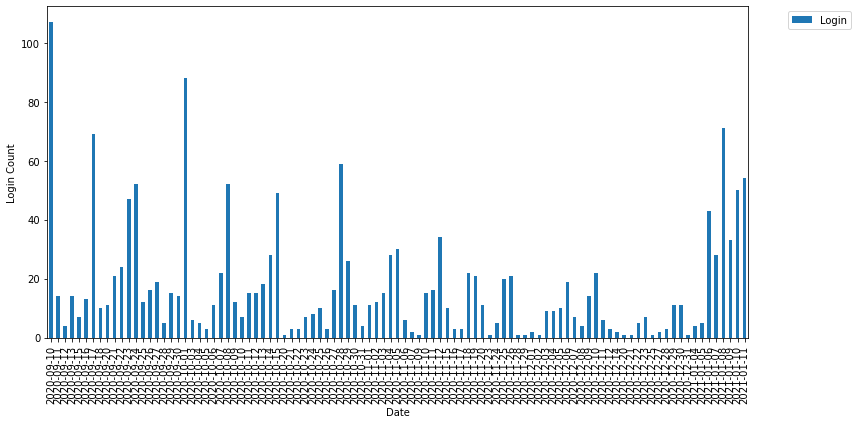

In [13]:
login_time = df_cest.loc[:, ['Login']]

dfg = login_time.groupby(login_time.Login.dt.date).count()

vis_1 = dfg.plot.bar(figsize=(12, 6), ylabel='Login Count', xlabel='Date')

vis_1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('./stalker_files/plots/login_vis_1.png')

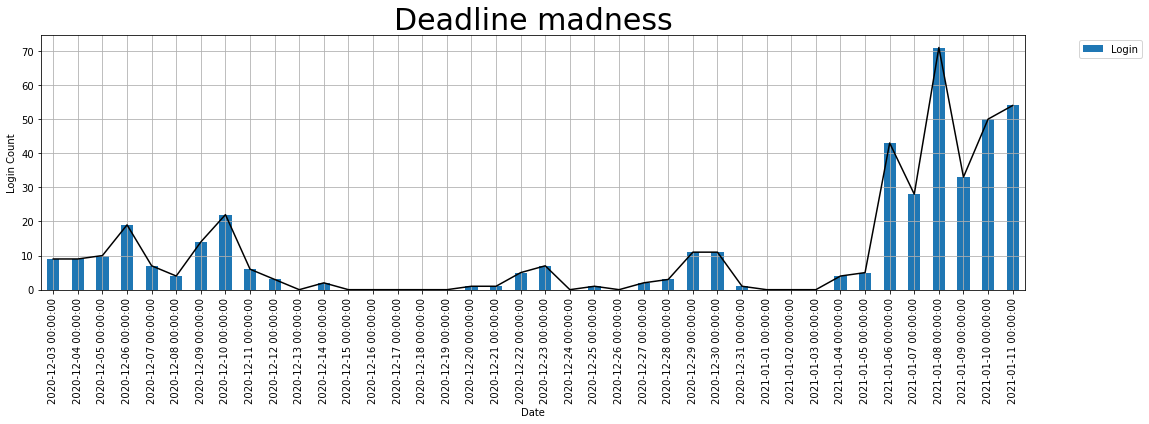

In [14]:
idx = pd.date_range('12-03-2020', '01-11-2021')
login_time = df_cest.loc[:, ['Login']]

s = login_time.groupby(login_time.Login.dt.date).count()
s = s.reindex(idx, fill_value=0)

vis_2 = s.plot.bar(figsize=(16, 6), ylabel='Login Count', xlabel='Date')
vis_2.plot(range(len(s.Login)), s.Login, color='k')
vis_2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Deadline madness", fontsize=30)
plt.grid()
plt.tight_layout()
plt.savefig('./stalker_files/plots/login_vis_2.png')

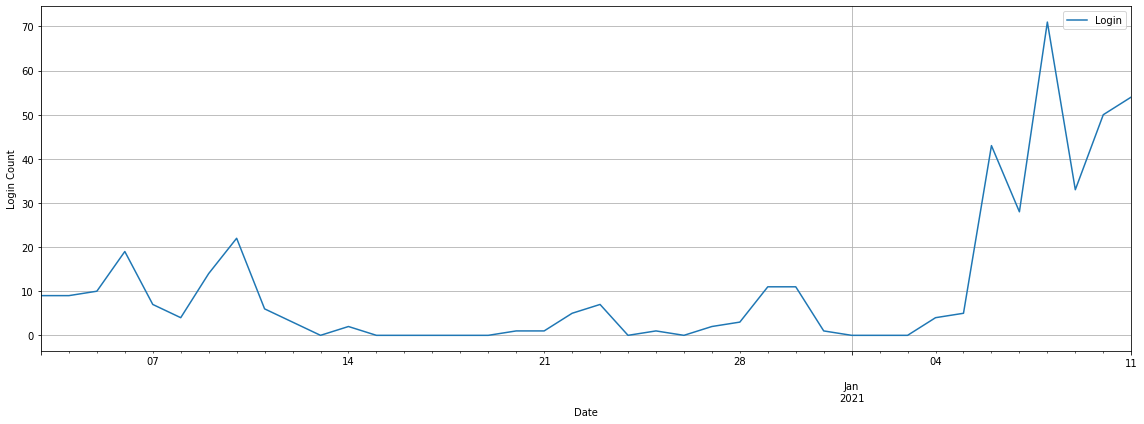

In [15]:
vis_3 = s.plot.line(figsize=(16, 6), ylabel='Login Count', xlabel='Date')
plt.grid()
plt.tight_layout()
plt.savefig('./stalker_files/plots/login_vis_3.png')

## Plotting time on the server for each user but sicin, sicin2020 and handyc

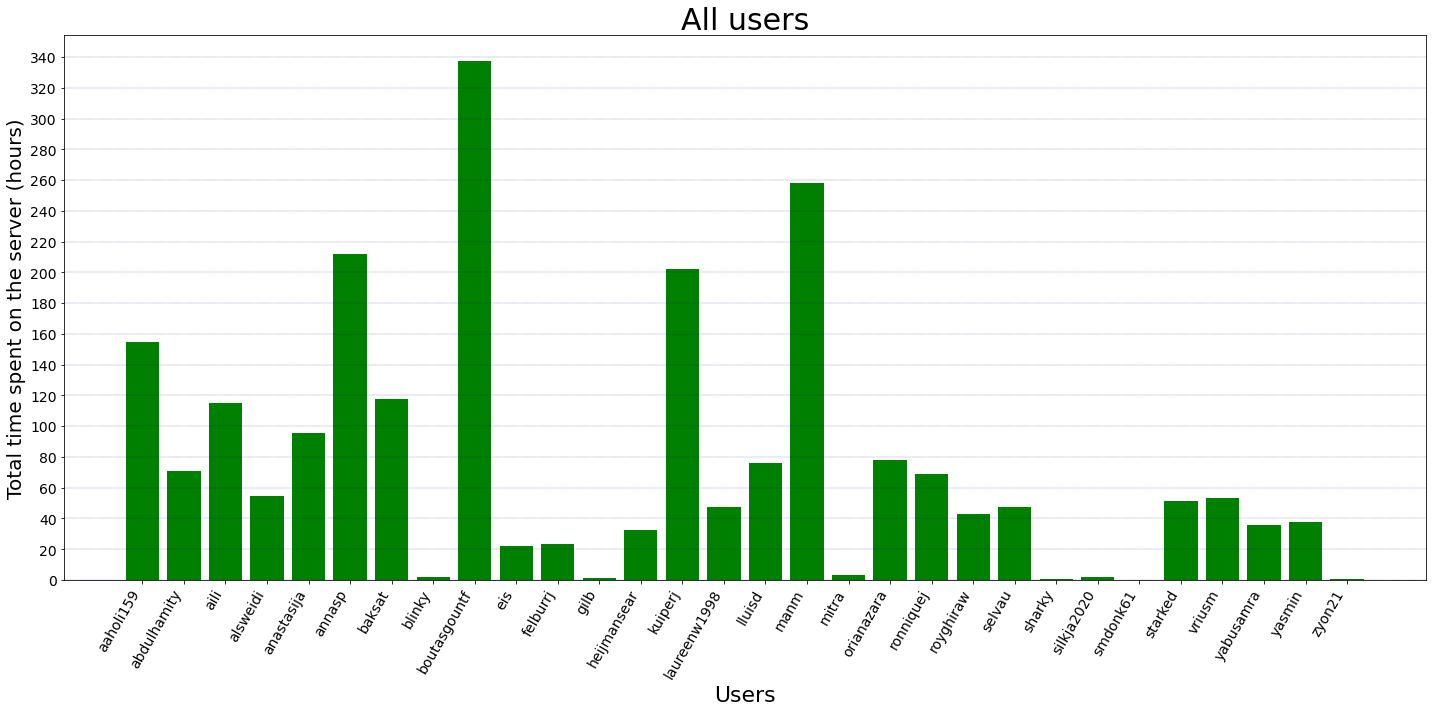

In [16]:
df_active = df_cest[["User", "Login", "Logout", "Active"]]
df_active["Active"] = df_active["Active"].dt.total_seconds() #converts timedelta into seconds

# students = df_active[active_df.User != "kurczak"] <== possible only if we don't want one user
students = df_active.loc[~df_active['User'].isin(["handyc", "sicin", "sicin2020"])] # ~ negates the boolean series
single_user = students.groupby("User")
time_spent_sec = single_user.sum()["Active"] # how much has each student spent on the server in total (s)
time_spent_hr = round(time_spent_sec/3600, 6) # converting that to hours <-- this is our y axis

users = [user for user, df_active in single_user] # <-- x axis
fig = plt.figure(figsize=(20, 10))
plt.title("All users", fontsize=30)
plt.bar(users, time_spent_hr, color="green")
plt.xticks(users, rotation=60, ha='right', fontsize=14)
plt.yticks(np.arange(0, 360, step=20), fontsize=14)
plt.ylabel("Total time spent on the server (hours)", fontsize=20)
plt.xlabel("Users", fontsize=22)
plt.grid(axis='y', color='DarkBlue', linestyle=':', linewidth=0.4)
plt.tight_layout()
plt.savefig('./stalker_files/plots/server_time_all.png')

#### Brightspace users

In [17]:
brightspace_students_inactive = ["smdonk61", "zyon21"]
brightspace_students = ["anastasija", "baksat", "boutasgountf", "lluisd", "orianazara", "royghiraw", "ronniquej", "aili", "kuiperj", "manm", "alsweidi", "aaholi159", "annasp", "starked", "laureenw1998", "abdulhamity", "smdonk61", "zyon21"]
non_brightspace_students = df_active.loc[~df_active['User'].isin(brightspace_students)] # ~ negates the boolean series

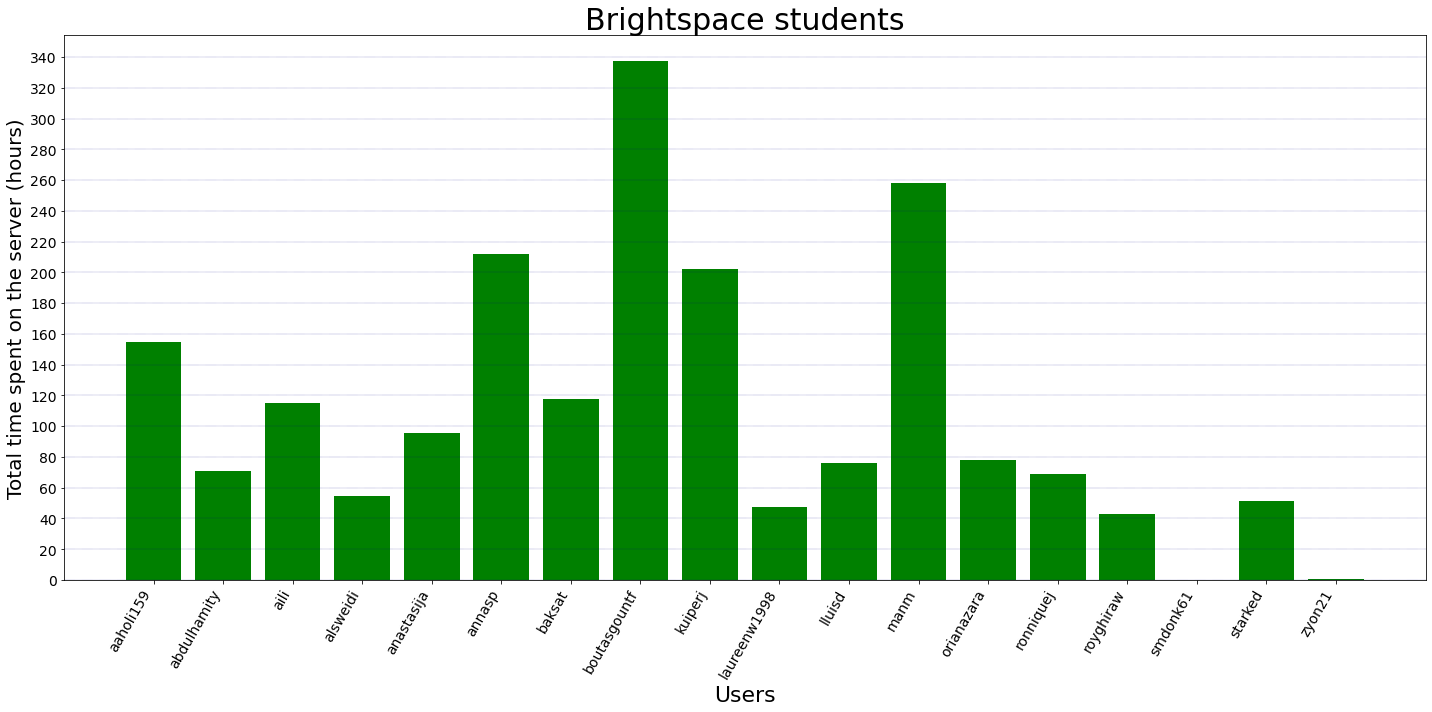

In [18]:
brightspace = df_active.loc[df_active['User'].isin(brightspace_students)]
# brightspace = non_brightspace_students <== if we want anyone but the brightspace users
single_user = brightspace.groupby("User")
time_spent_sec = single_user.sum()["Active"] # how much has each student spent on the server in total (s)
time_spent_hr = round(time_spent_sec/3600, 6) # converting that to hours <-- this is our y axis

users = [user for user, df_active in single_user] # <-- x axis
fig = plt.figure(figsize=(20, 10))
plt.title("Brightspace students", fontsize=30)
plt.bar(users, time_spent_hr, color="green")
plt.xticks(users, rotation=60, ha='right', fontsize=14)
plt.yticks(np.arange(0, 360, step=20), fontsize=14)
plt.ylabel("Total time spent on the server (hours)", fontsize=20)
plt.xlabel("Users", fontsize=22)
plt.grid(axis='y', color='DarkBlue', linestyle=':', linewidth=0.4)
plt.tight_layout()
plt.savefig('./stalker_files/plots/server_time_brightspace.png')

## Time spent on assignments

In [19]:
df_active = df_active.set_index(pd.DatetimeIndex(df_active['Login']).date)

In [20]:
df_active.index = pd.to_datetime(df_active.index)
assignment_1 = df_active.loc['2020-09-10':'2020-09-16']
assignment_1.name = "Assignment 1"
assignment_2 = df_active.loc['2020-09-17':'2020-09-23']
assignment_2.name = "Assignment 2"
assignment_3 = df_active.loc['2020-09-24':'2020-09-30']
assignment_3.name = "Assignment 3"
assignment_4 = df_active.loc['2020-10-01':'2020-10-07']
assignment_4.name = "Assignment 4"
assignment_5 = df_active.loc['2020-10-08':'2020-10-15']
assignment_5.name = "Assignment 5"
assignment_6 = df_active.loc['2020-10-15':'2020-10-28']
assignment_6.name = "Assignment 6"
assignment_7 = df_active.loc['2020-10-29':'2020-11-04']
assignment_7.name = "Assignment 7"
assignment_8 = df_active.loc['2020-11-05':'2020-11-11']
assignment_8.name = "Assignment 8"
assignment_9 = df_active.loc['2020-11-12':'2020-11-18']
assignment_9.name = "Assignment 9"
assignment_10 = df_active.loc['2020-11-19':'2020-11-25']
assignment_10.name = "Assignment 10"
final_proj = df_active.loc['2020-12-03':'2021-01-11']
final_proj.name = "Final Project"
# assignment_11 = df_active.loc['2020-09-10':'2020-09-16']
# assignment_12 = df_active.loc['2020-09-10':'2020-09-16']

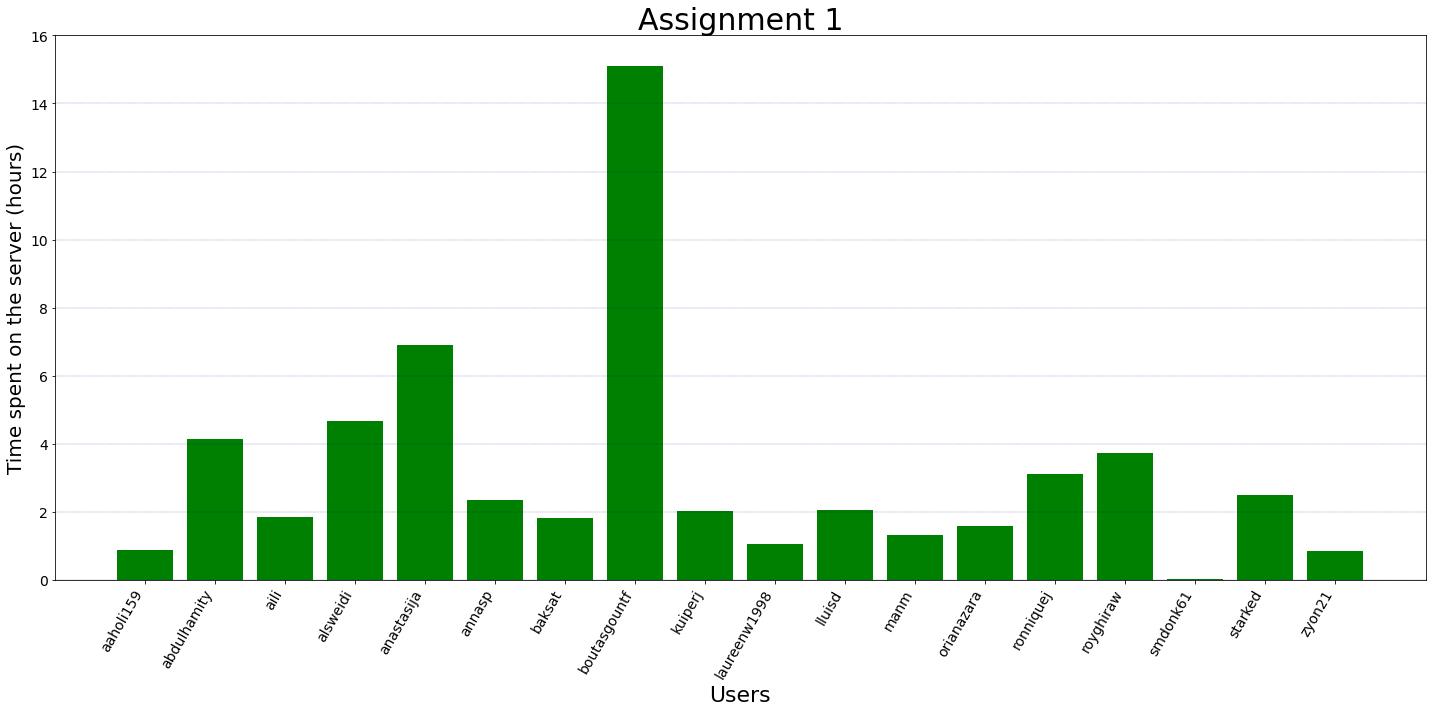

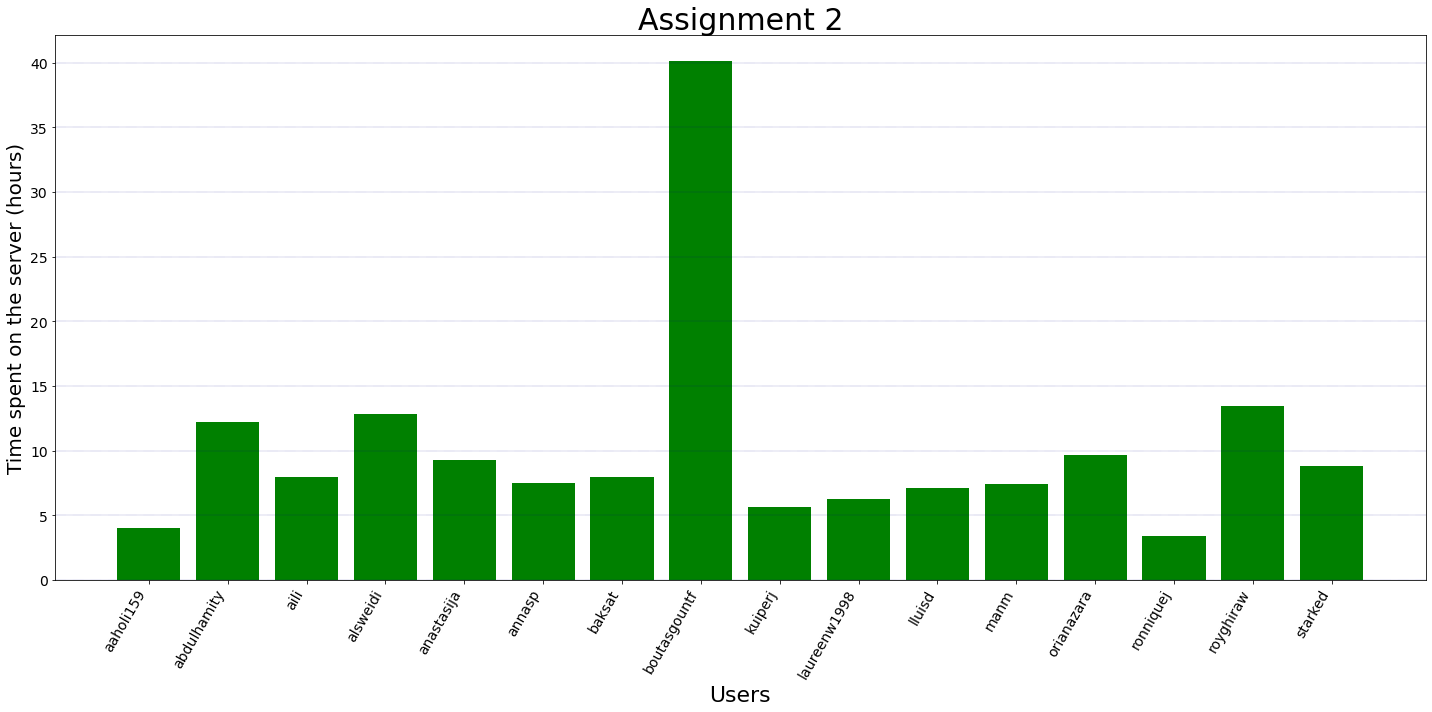

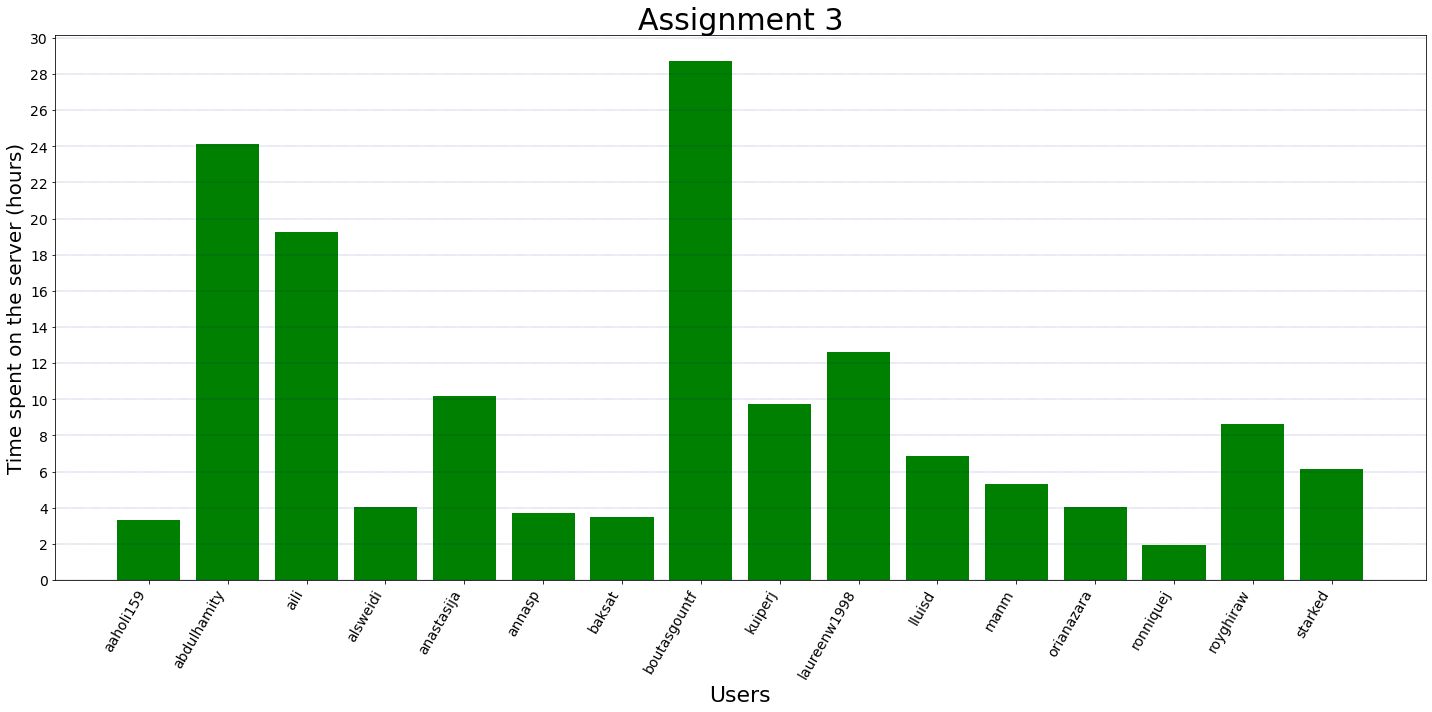

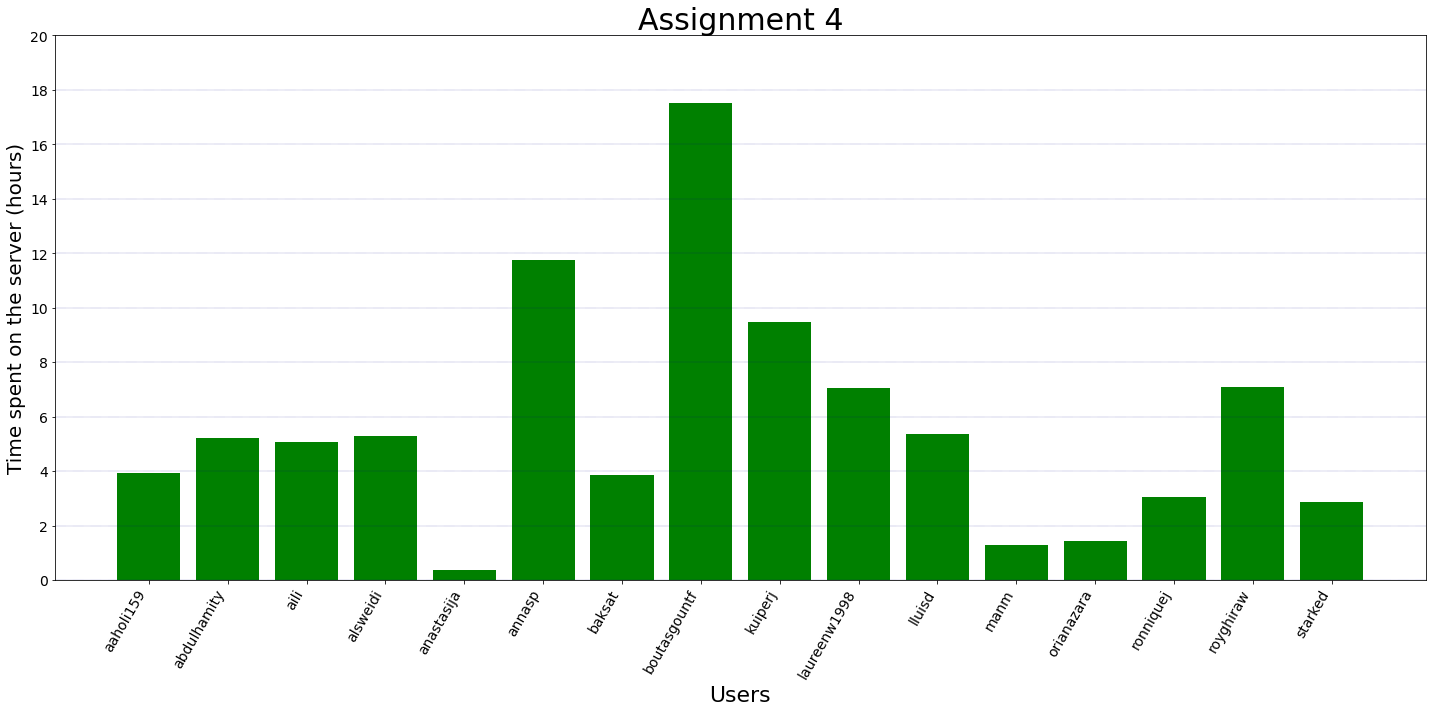

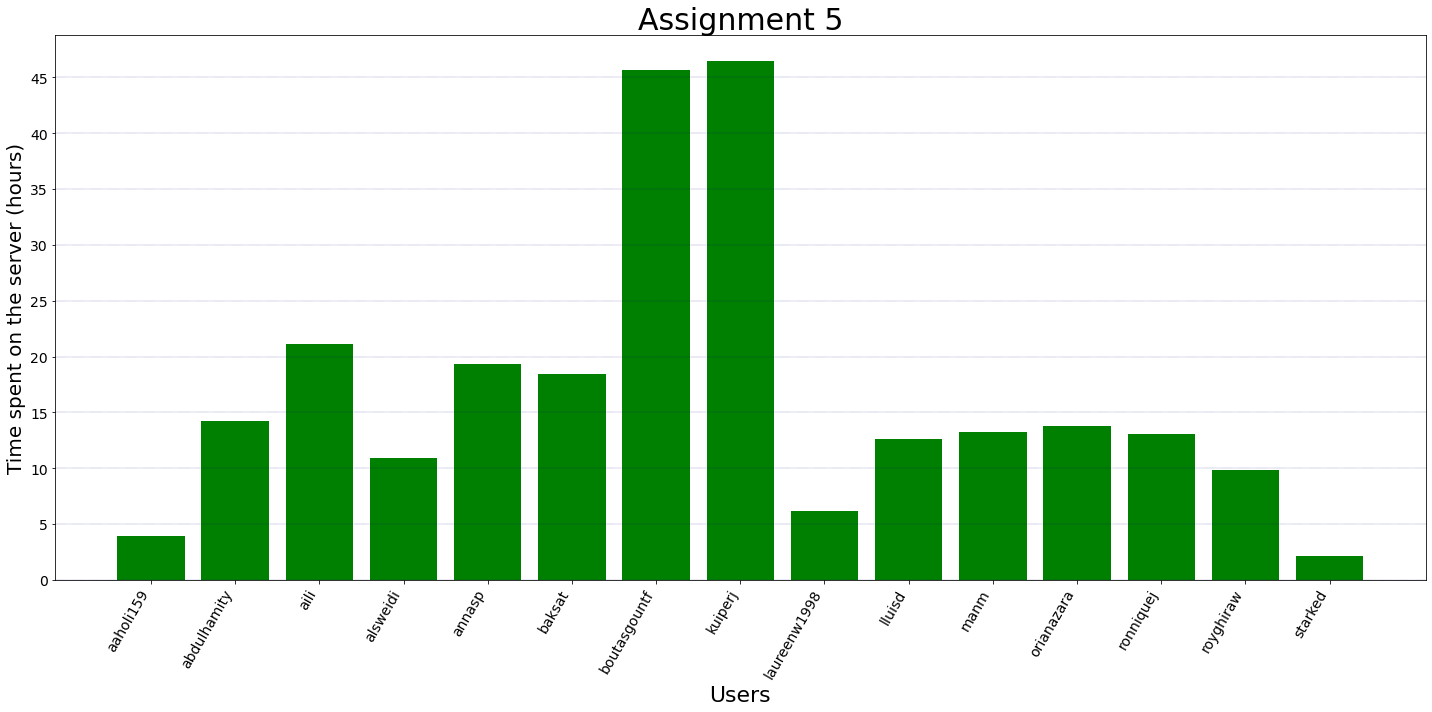

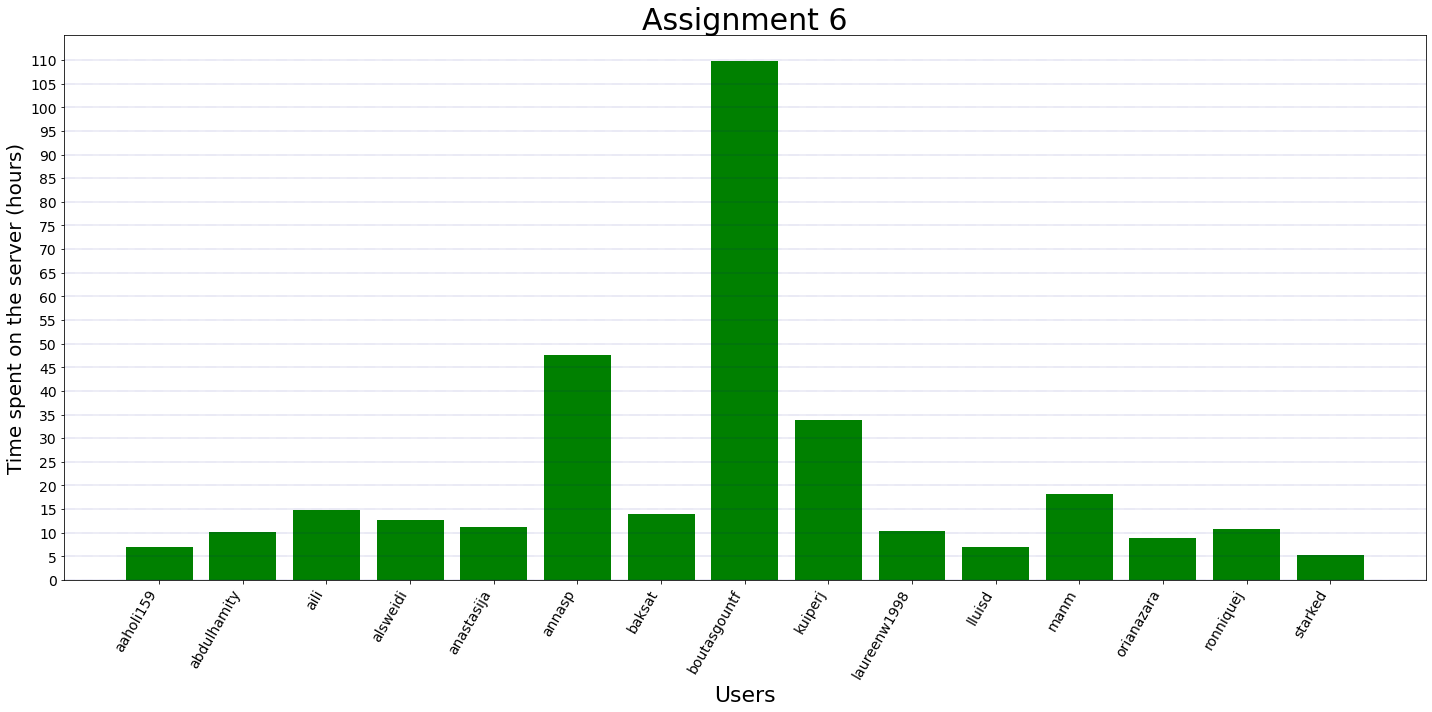

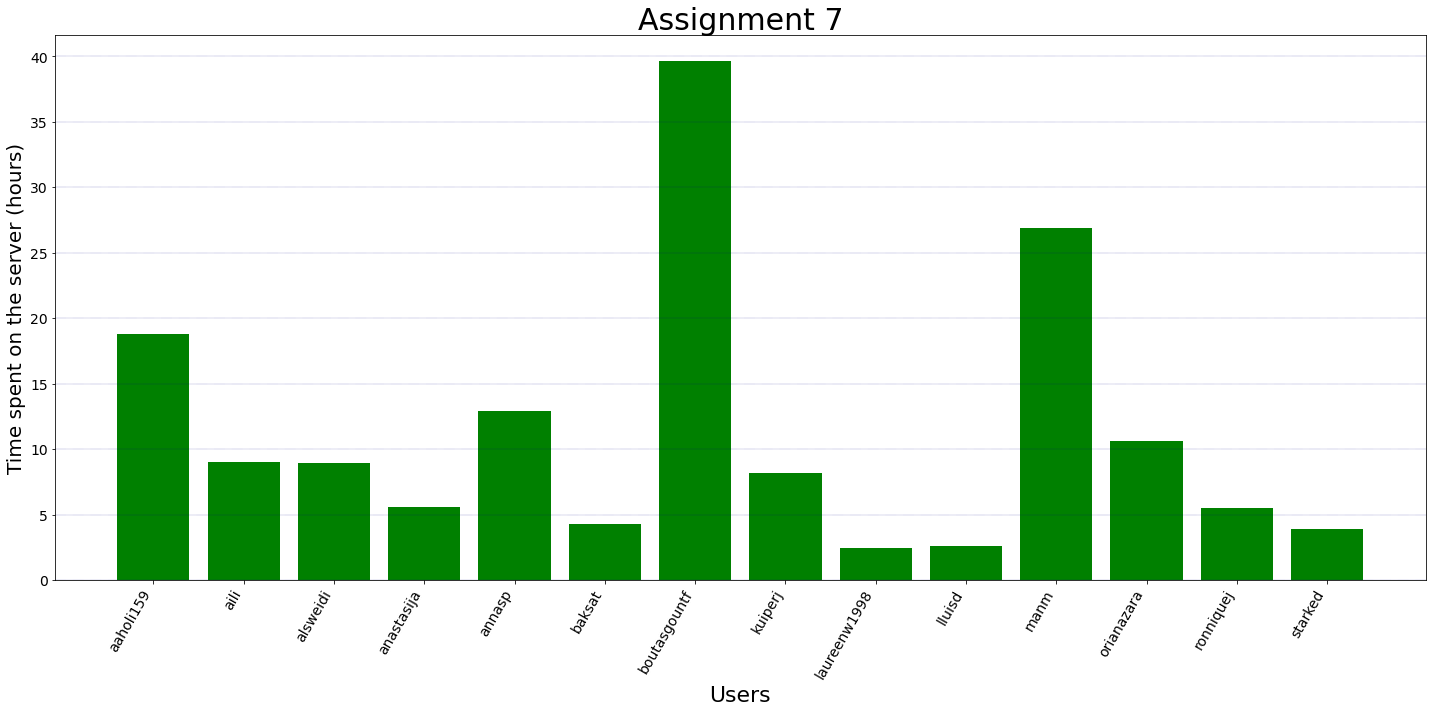

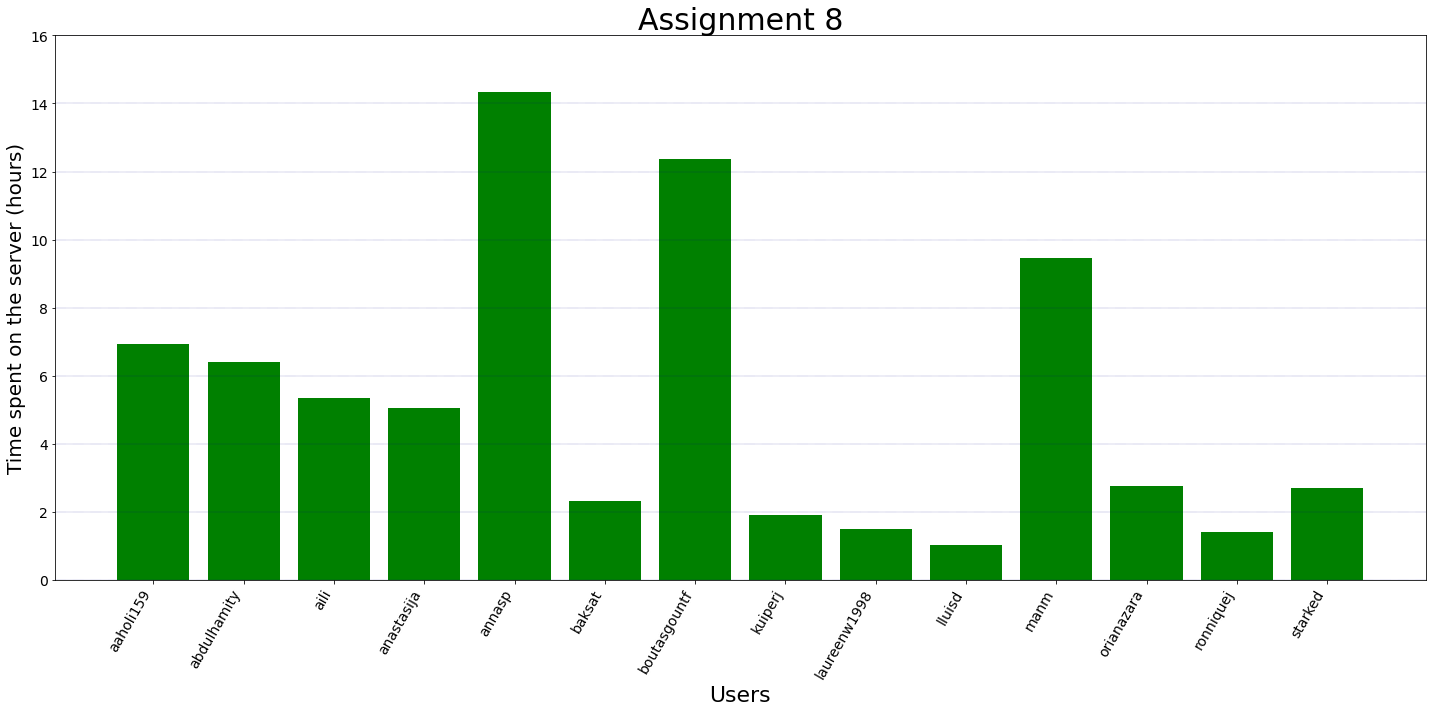

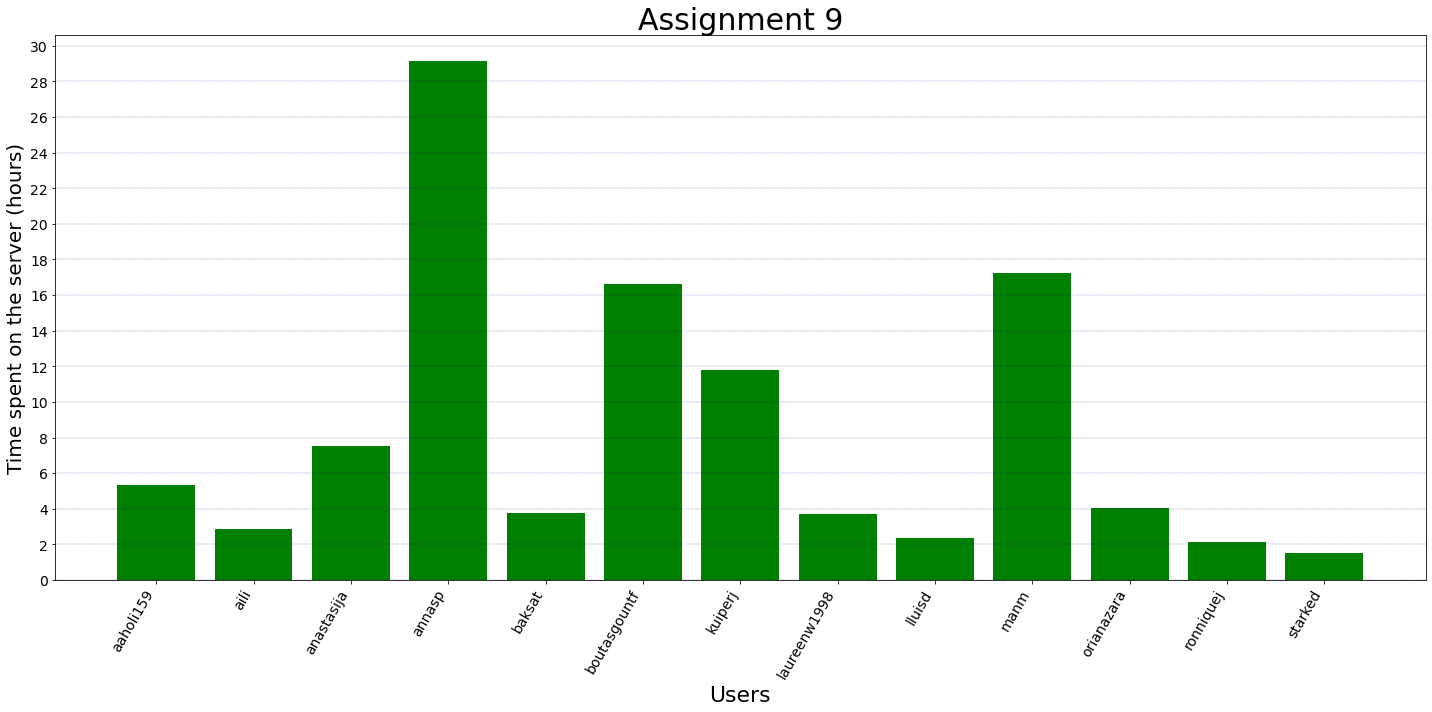

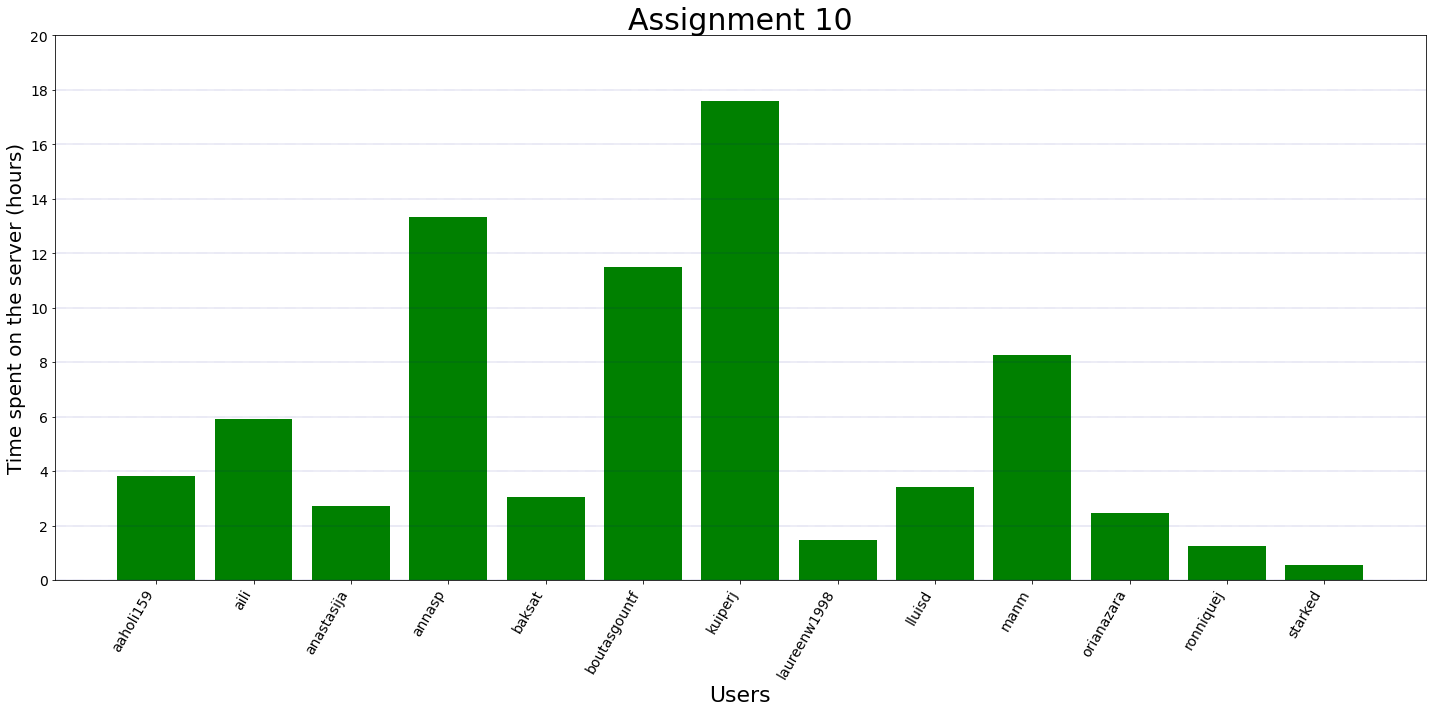

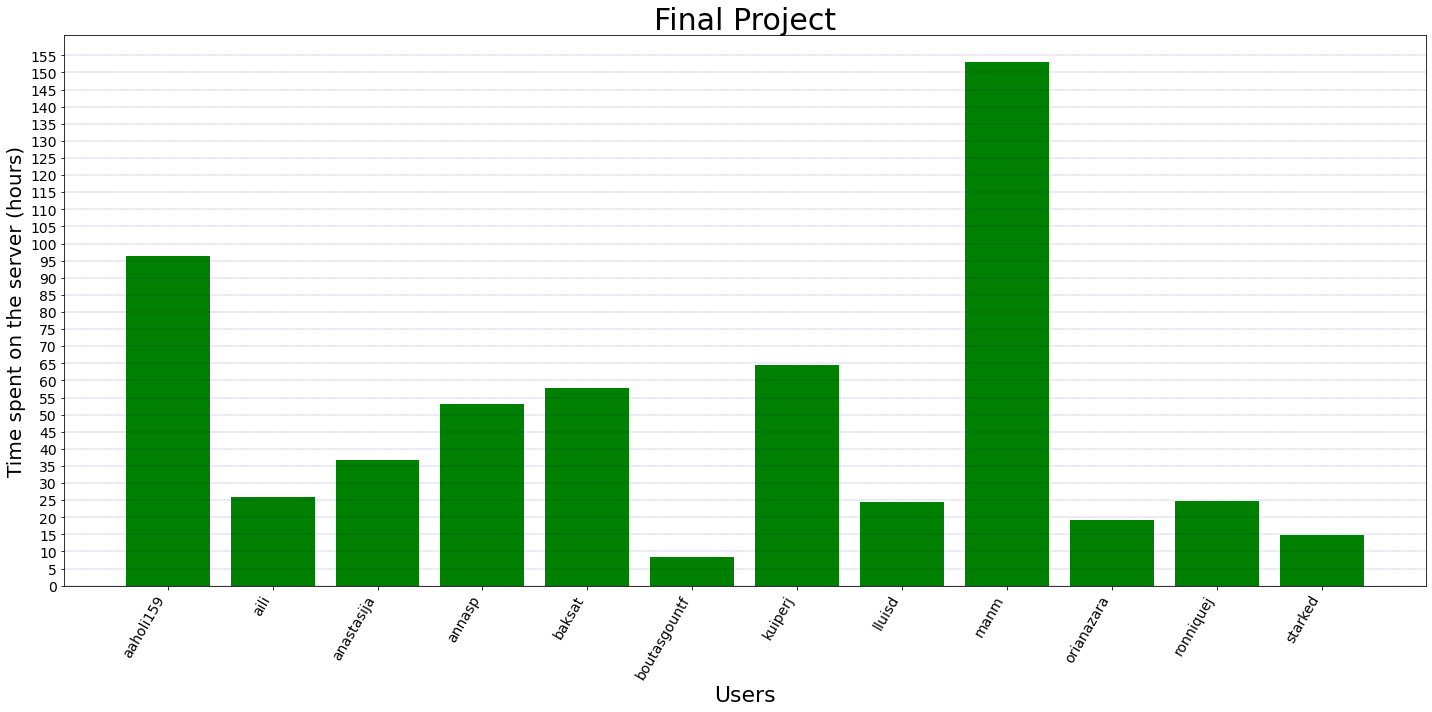

In [21]:
assignments = [assignment_1, assignment_2, assignment_3, assignment_4, assignment_5, assignment_6, assignment_7, assignment_8, assignment_9, assignment_10, final_proj]
for assignment in assignments:
    title = assignment.name
    brightspace = assignment.loc[assignment['User'].isin(brightspace_students)]
    single_user = brightspace.groupby("User")
    time_spent_sec = single_user.sum()["Active"] # how much has each student spent on the server in total (s)
    time_spent_hr = round(time_spent_sec/3600, 2) # converting that to hours <-- this is our y axis

    a = assignment.loc[assignment['User'] == 'boutasgountf'].sum()["Active"] # most active users = hight of the y axis
    b = assignment.loc[assignment['User'] == 'annasp'].sum()["Active"]
    c = assignment.loc[assignment['User'] == 'kuiperj'].sum()["Active"]
    d = assignment.loc[assignment['User'] == 'manm'].sum()["Active"]
    x = max(a, b, c, d)
    x_hr = round(x/3600, 0)
    yticks_stop = x_hr + 3 if x_hr % 2 == 1 else x_hr + 4
    yticks_step = 5 if x_hr >= 30 else 2
    users = [user for user, assignment in single_user] # <-- x axis
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{title}", fontsize=30)
    plt.bar(users, time_spent_hr, color="green")
    plt.xticks(users, rotation=60, ha='right', fontsize=14)
    plt.yticks(np.arange(0, yticks_stop, step=yticks_step), fontsize=14)
    plt.ylabel("Time spent on the server (hours)", fontsize=20)
    plt.xlabel("Users", fontsize=22)
    plt.grid(axis='y', color='DarkBlue', linestyle=':', linewidth=0.4)
    plt.tight_layout()
    plt.savefig(f'./stalker_files/plots/{title}.png')

## Student attendance

In [22]:
with contextlib.suppress(FileNotFoundError):
    os.remove("./stalker_files/files/assignment_login.txt")
for assignment in assignments:
    for student in brightspace_students:
        if student not in assignment.values: 
            print(f"{student} did not log in during {assignment.name}.", file=open("./stalker_files/files/assignment_login.txt", "a"))
    print("\n", file=open("./stalker_files/files/assignment_login.txt", "a"))

## Final project attendance

In [23]:
# final_proj = df_active.loc['2020-12-03':'2021-01-11']
# final_proj.name = "Final Project"

In [24]:
# for student in brightspace_students:
#     if student not in final_proj.values:
#         print(f"{student} did not log in during {assignment.name}.", file=open("./stalker_files/files/final_project_login.txt", "a"))
#     else:
#         pass
# print("\n", file=open("./stalker_files/files/final_project_login.txt", "a"))

## Lab attendance

In [25]:
lab_1 = df_active.loc['2020-09-10']
lab_1.name = "Lab 1"
lab_2 = df_active.loc['2020-09-17']
lab_2.name = "Lab 2"
lab_3 = df_active.loc['2020-09-24']
lab_3.name = "Lab 3"
lab_4 = df_active.loc['2020-10-01']
lab_4.name = "Lab 4"
lab_5 = df_active.loc['2020-10-08']
lab_5.name = "Lab 5"
lab_6 = df_active.loc['2020-10-15']
lab_6.name = "Lab 6"
lab_7 = df_active.loc['2020-10-29']
lab_7.name = "Lab 7"
lab_8 = df_active.loc['2020-11-05']
lab_8.name = "Lab 8"
lab_9 = df_active.loc['2020-11-12']
lab_9.name = "Lab 9"
lab_10 = df_active.loc['2020-11-19']
lab_10.name = "Lab 10"
labs = [lab_1, lab_2, lab_3, lab_4, lab_5, lab_6, lab_7, lab_8, lab_9, lab_10]

In [26]:
with contextlib.suppress(FileNotFoundError):
    os.remove("./stalker_files/files/absences_det.txt")
for lab in labs:
    for student in brightspace_students:
        if student not in lab.values: 
            print(f"{student} was not logged in during {lab.name}.", file=open("./stalker_files/files/absences_det.txt", "a"))
    print("\n", file=open("./stalker_files/files/absences_det.txt", "a"))

In [27]:
absence = [student for lab, student in itertools.product(labs, brightspace_students) if student not in lab.values]
absence_count = Counter(absence)
with contextlib.suppress(FileNotFoundError):
    os.remove("./stalker_files/files/absences.txt")
for value, count in absence_count.most_common():
    print(value, count, file=open("./stalker_files/files/absences.txt", "a"))

In [28]:
df_times = df[["User", "Login", "Active"]]
df_times = df_times.set_index(pd.DatetimeIndex(df_times['Login']).date)
df_times.index = pd.to_datetime(df_times.index)
df_times


,User,Login,Active
2020-09-10,handyc,2020-09-10 03:31:05+00:00,0 days 00:42:53
2020-09-10,handyc,2020-09-10 08:51:35+00:00,0 days 05:09:00
2020-09-10,heijmansear,2020-09-10 08:52:41+00:00,0 days 00:00:02
2020-09-10,sicin,2020-09-10 08:58:46+00:00,0 days 02:12:14
2020-09-10,eis,2020-09-10 09:01:11+00:00,0 days 00:00:01
...,...,...,...
2021-01-11,anastasija,2021-01-11 19:49:14+00:00,0 days 02:12:29
2021-01-11,aaholi159,2021-01-11 20:31:40+00:00,0 days 02:41:59
2021-01-11,baksat,2021-01-11 21:34:54+00:00,0 days 00:00:22
2021-01-11,anastasija,2021-01-11 22:21:21+00:00,NaT


In [29]:
assignment_1 = df_times.loc['2020-09-10':'2020-09-16']
assignment_1.name = "Assignment 1"
assignment_2 = df_times.loc['2020-09-17':'2020-09-23']
assignment_2.name = "Assignment 2"
assignment_3 = df_times.loc['2020-09-24':'2020-09-30']
assignment_3.name = "Assignment 3"
assignment_4 = df_times.loc['2020-10-01':'2020-10-07']
assignment_4.name = "Assignment 4"
assignment_5 = df_times.loc['2020-10-08':'2020-10-15']
assignment_5.name = "Assignment 5"
assignment_6 = df_times.loc['2020-10-15':'2020-10-28']
assignment_6.name = "Assignment 6"
assignment_7 = df_times.loc['2020-10-29':'2020-11-04']
assignment_7.name = "Assignment 7"
assignment_8 = df_times.loc['2020-11-05':'2020-11-11']
assignment_8.name = "Assignment 8"
assignment_9 = df_times.loc['2020-11-12':'2020-11-18']
assignment_9.name = "Assignment 9"
assignment_10 = df_times.loc['2020-11-19':'2020-11-25']
assignment_10.name = "Assignment 10"

assignments_v2 = [assignment_1, assignment_2, assignment_3, assignment_4, assignment_5, assignment_6, assignment_7, assignment_8, assignment_9, assignment_10]

In [30]:
# for ass in assignments_v2:
#     x = ass.loc[ass['User'].isin(brightspace_students)]
#     single_user = x.groupby("User")
#     time_spent = single_user.sum()["Active"] # how much has each student spent on the server in total (s)
#     # time_spent_hr = round(time_spent_sec/3600, 6)
#     print(ass.name,"\n" , time_spent, "\n", file=open("./stalker_files/files/assignments_times.txt", "a"))

## Final Project times

In [31]:
final_proj = df_times.loc['2020-12-03':'2021-01-11']
final_proj.name = "Final Project"

In [32]:
x = final_proj.loc[final_proj['User'].isin(brightspace_students)]
single_user = x.groupby("User")
time_spent = single_user.sum()["Active"] # how much has each student spent on the server in total (s)
# time_spent_hr = round(time_spent_sec/3600, 6)
print(final_proj.name,"\n" , time_spent, "\n", file=open("./stalker_files/files/final_project.txt", "a"))

## Finding all unique IP addresses for a user

In [33]:
ip_unique = df.loc[:, ["User", "IP"]]
ip_unique.drop_duplicates(['User', 'IP'], keep="last", inplace=True)
ip_unique

,User,IP
2,heijmansear,31.21.237.158
4,eis,31.21.237.158
5,heijmansear,145.118.227.40
6,abdulhamity,31.21.237.158
7,aaholi159,31.21.237.158
...,...,...
1673,sicin,83.28.219.37
1680,aaholi159,80.114.142.14
1681,baksat,213.134.230.105
1682,anastasija,217.63.247.81


In [34]:
# ip_unique = df.drop_duplicates('IP', keep="last", inplace=True) # możliwe, że bez .drop_duplicates('IP')

# ip_unique[['User', 'IP']]


In [35]:
# ip_unique = all_data.groupby('IP').first().reset_index()

# test

In [36]:
# singular IPs become "NaN"
# df_0 = ip_unique
# df['Grouped'] = df_0.groupby('User')['IP'].transform(lambda x: ", ".join(x))

# if I don't want users with only one IP
# df = ip_unique[ip_unique['User'].duplicated(keep=False)]

ip_unique['Grouped'] = ip_unique.groupby('User')['IP'].transform(lambda x: ", ".join(x))

ip_unique = ip_unique[['User', 'Grouped']].drop_duplicates()
# ip_unique = ip_unique.loc[:,['User', 'Grouped']].drop_duplicates() #chyba lepsze

In [ ]:
ip_unique.sort_values(by=['User'], inplace=True)
ip_unique.reset_index(drop=True, inplace=True)
ip_unique.index = ip_unique.index + 1
ip_unique

### Exporting to HTML

In [ ]:
pd.DataFrame.to_html(ip_unique)